In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import os 

In [6]:
hs.dtypes

code           object
name           object
price          object
domain         object
eps           float64
bps           float64
roe           float64
shares        float64
sub_shares    float64
market_cap     object
dtype: object

In [8]:
hs.query("price == '-'")

,code,name,price,domain,eps,bps,roe,shares,sub_shares,market_cap
37,601995,中金公司,-,金融,1.24,20.2187,6.29,48.27,29.24,1020.02
104,601059,信达证券,-,金融,0.40,6.2799,6.44,32.43,6.92,123.04


In [20]:
# load the data
hs = pd.read_csv('../data/input/hs300_list_20251213.csv')
hs['code'] = hs['code'].astype(str).str.zfill(6)

# remove the price == '-'
hs = hs.query("price != '-'")
hs['price'] = hs['price'].astype(float)

# calcualte pr
hs['pe'] = hs['price'] / hs['eps']
hs['pb'] = hs['price'] / hs['bps']
hs['pr'] = hs['pe'] / hs['roe']
hs.head()

,code,name,price,domain,eps,bps,roe,shares,sub_shares,market_cap,pe,pb,pr
0,688981,中芯国际,116.80,电子设备,0.4800,18.8982,2.60,80.00,20.00,2335.49,243.333333,6.180483,93.589744
1,688599,天合光能,16.85,电气设备,-1.9500,9.7762,-17.36,23.43,23.43,394.72,-8.641026,1.723574,0.497755
2,688506,百利天恒,359.93,医药生物,-1.2300,17.3682,-13.59,4.13,1.03,370.34,-292.626016,20.723506,21.532452
3,688472,阿特斯,16.00,电子设备,0.2700,6.3669,4.28,36.88,13.93,222.84,59.259259,2.512997,13.845621
4,688396,华润微,55.20,电子设备,0.3963,17.2455,2.32,13.28,13.28,732.8,139.288418,3.200835,60.038111


<Axes: xlabel='pr'>

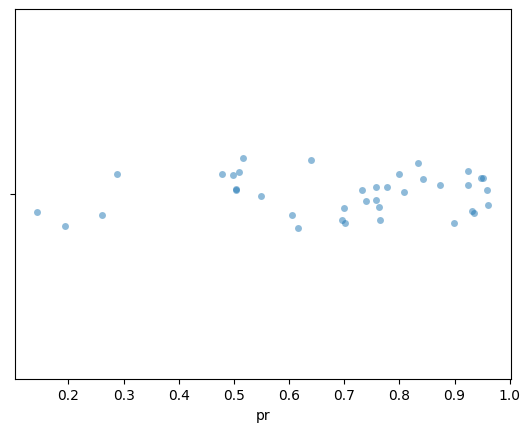

In [23]:
sns.stripplot(data=hs.query("(pr > 0) & (pr < 1)"), x='pr',jitter=True, alpha=0.5)


<Axes: xlabel='pe', ylabel='pb'>

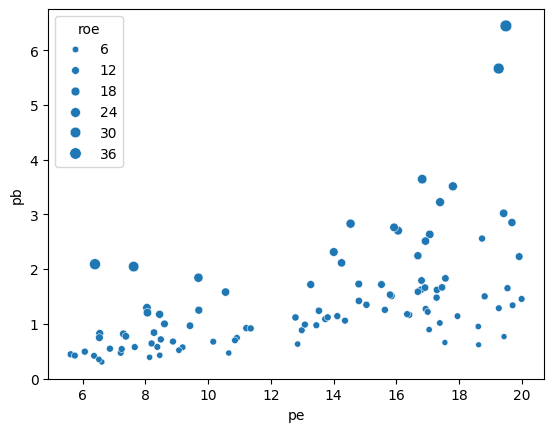

In [28]:
sns.scatterplot(data=hs.query("(pe > 0) & (pe < 20) & (pb < 10)"), x='pe', y='pb', size='roe')